In [1]:
import pandas as pd

In [2]:
file_path='marketing_data.csv'
df=pd.read_csv(file_path)

In [3]:
df_info=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
df_head=df.head()

In [5]:
df_head

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
df['Income'] = df['Income'].str.replace(r'[\$,]', '', regex=True).astype(float)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [8]:
df['Income'] = df['Income'].str.replace(r'[\$,]', '', regex=True).astype(float)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

In [9]:
df['Education'] = df['Education'].str.strip().replace({
    '2n Cycle': 'Undergraduate', 'Basic': 'Basic', 'Graduation': 'Graduate',
    'Master': 'Postgraduate', 'PhD': 'PhD'
})

In [10]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single',
    'Divorced': 'Separated', 'Widow': 'Separated'
})

In [11]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(
    lambda x: x.fillna(x.mean())
)

In [12]:
df['Age'] = 2025 - df['Year_Birth']
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [13]:
numerical_cols = ['Income', 'Age', 'Total_Spending', 'Total_Purchases']

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from scipy import stats

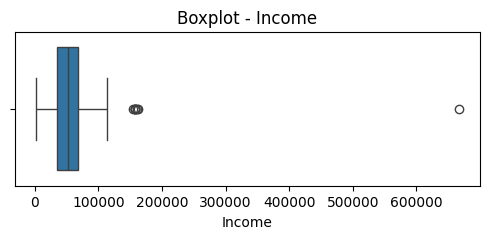

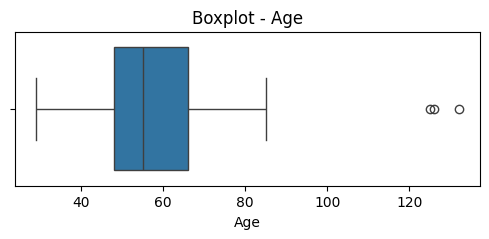

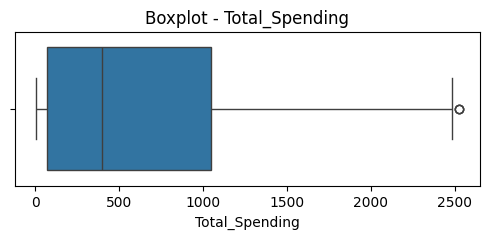

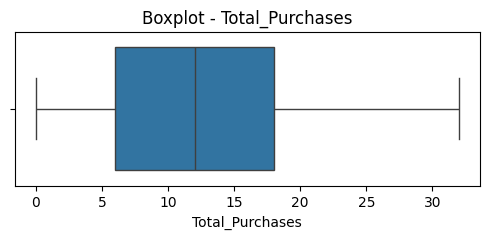

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

In [16]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [17]:
ordinal_encoder = OrdinalEncoder()
df['Education_encoded'] = ordinal_encoder.fit_transform(df[['Education']])
df = pd.get_dummies(df, columns=['Marital_Status', 'Country'], drop_first=True)

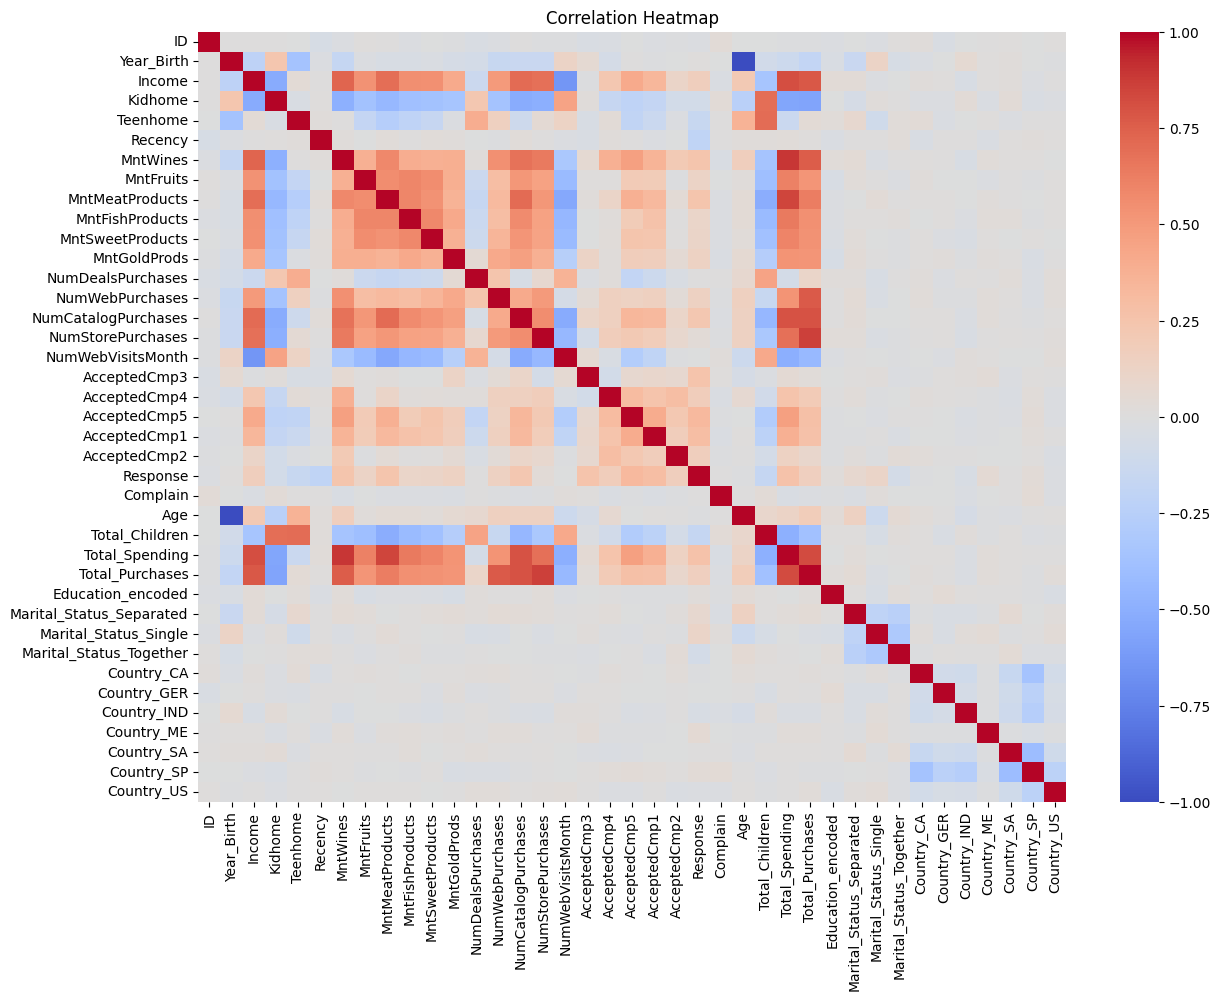

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# H1: Older people prefer shopping in-store
older = df[df['Age'] > df['Age'].median()]
younger = df[df['Age'] <= df['Age'].median()]
print("H1 - Store Purchases:")
print(stats.ttest_ind(older['NumStorePurchases'], younger['NumStorePurchases']))

# H2: Customers with kids prefer shopping online
with_kids = df[df['Total_Children'] > 0]
without_kids = df[df['Total_Children'] == 0]
print("\nH2 - Web Purchases:")
print(stats.ttest_ind(with_kids['NumWebPurchases'], without_kids['NumWebPurchases']))

# H3: Other channels cannibalize store sales
df['Non_Store_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
print("\nH3 - Correlation between Non_Store_Purchases and Store Purchases:")
print(df[['Non_Store_Purchases', 'NumStorePurchases']].corr())

# H4: Does the US perform better than others?
df['Is_US'] = df['Country_US'] if 'Country_US' in df.columns else 0
us_purchases = df[df['Is_US'] == 1]['Total_Purchases']
non_us_purchases = df[df['Is_US'] == 0]['Total_Purchases']
print("\nH4 - US vs Rest Total Purchases:")
print(stats.ttest_ind(us_purchases, non_us_purchases))

H1 - Store Purchases:
TtestResult(statistic=np.float64(6.3391483172895375), pvalue=np.float64(2.7888791192543576e-10), df=np.float64(2224.0))

H2 - Web Purchases:
TtestResult(statistic=np.float64(-3.4514919138261226), pvalue=np.float64(0.0005679068676923386), df=np.float64(2224.0))

H3 - Correlation between Non_Store_Purchases and Store Purchases:
                     Non_Store_Purchases  NumStorePurchases
Non_Store_Purchases             1.000000           0.631329
NumStorePurchases               0.631329           1.000000

H4 - US vs Rest Total Purchases:
TtestResult(statistic=np.float64(1.2353356244661409), pvalue=np.float64(0.21683610001190007), df=np.float64(2224.0))


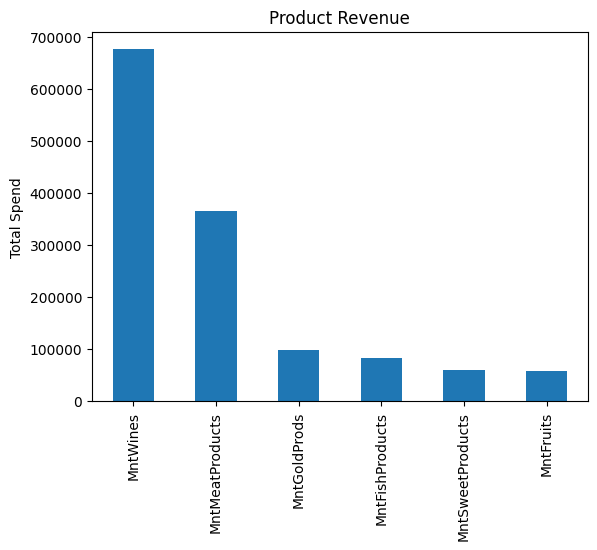

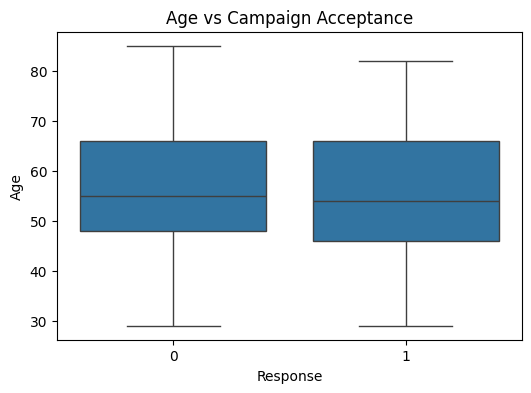

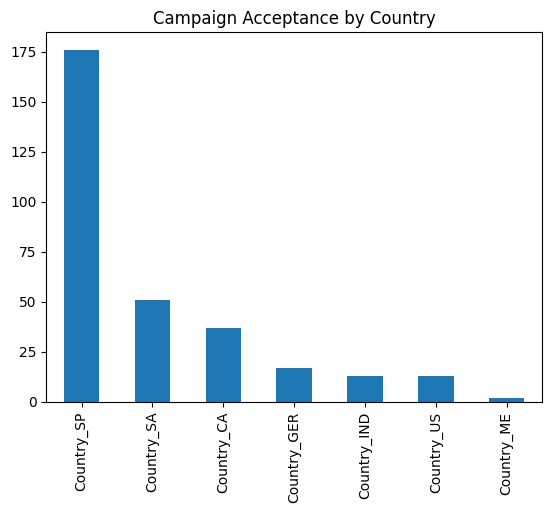

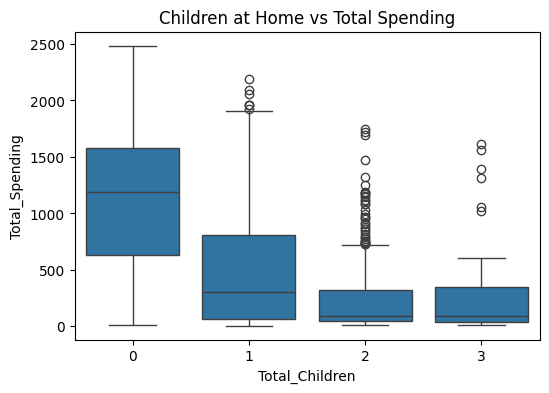

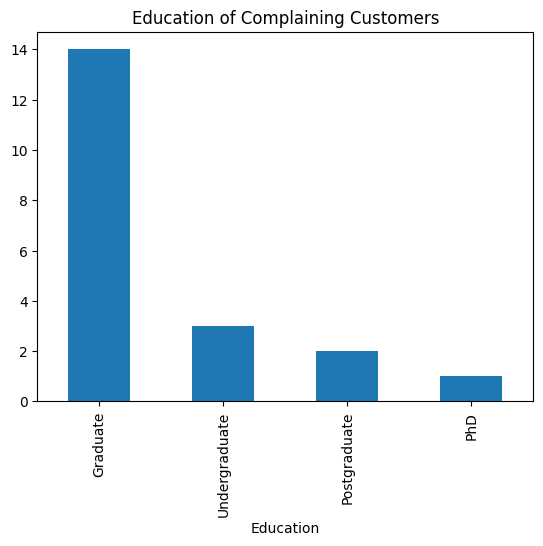

In [20]:
# a. Product revenue
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_totals = df[product_cols].sum().sort_values(ascending=False)
product_totals.plot(kind='bar', title='Product Revenue', ylabel='Total Spend')
plt.show()

# b. Age vs Last Campaign Acceptance
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age vs Campaign Acceptance')
plt.show()

# c. Country with most campaign acceptances
country_acceptance = df[df['Response'] == 1].filter(like='Country_').sum()
country_acceptance.sort_values(ascending=False).plot(kind='bar', title='Campaign Acceptance by Country')
plt.show()

# d. Children at home vs Total Spending
plt.figure(figsize=(6, 4))
sns.boxplot(x='Total_Children', y='Total_Spending', data=df)
plt.title('Children at Home vs Total Spending')
plt.show()

# e. Education of customers who complained
complain_edu = df[df['Complain'] == 1]['Education'].value_counts()
complain_edu.plot(kind='bar', title='Education of Complaining Customers')
plt.show()